In [1]:
import sys; sys.path.insert(0,'../')
from notebook_tools import *
from matplotlib.ticker import NullFormatter,MultipleLocator, FormatStrFormatter
from matplotlib import ticker
%matplotlib inline

# load or trees, apply required cuts and modify variable names

In [39]:
variables = ['A'
             ,'Np','Np_g','Xb','Xb_g','Q2','Q2_g'
             ,'Pmiss.P()'    ,'Pmiss.Pt()' ,'theta_pq'     ,'p_over_q'             
             ,'Pcm.P()'
             ,'protons[0].P()', 'protons[1].P()','protons[2].P()'
             ,'protons_g[0].P()', 'protons_g[1].P()','protons_g[2].P()'
             ,'theta23','theta23_g'
             ,'T23','E_R','m23','k23'
             ,'Mmiss2','Mmiss3'
             ,'Emiss','Emiss_g'
             ,'alpha_3N','W2_3N','k_t','beta_1','beta_2'
            ]

In [40]:
allfile = ROOT.TFile('/Users/erezcohen/Desktop/DataMining/AnaFiles/Ana_GSIMulationOutput_run5001.root')
alltree = allfile.Get('anaTree') 
allana = tree2array( alltree, branches=variables )

In [50]:
generated = allana[allana['Np_g']==3]
print len(generated),'generated events'
reconstructed = allana[allana['Np']==3]
print len(reconstructed),'selected events'

990 generated events
531 selected events


# $E_{miss}$ vs. $\theta_{23}$

In [102]:
xbins,ybins = linspace(0,0.3,5),linspace(0,50,5)
xcenters = 0.5*(xbins[1:]+xbins[:-1])
ycenters = 0.5*(ybins[1:]+ybins[:-1])
xticklabels=["%.1f"%x for x in xcenters]
yticklabels=["%.1f"%y for y in ycenters]
nx=len(xbins)-1
ny=len(ybins)-1
x_label=r'$E_{miss}$ [GeV]'
y_label=r'$\theta_{23}$ [deg.]'
xvar = 'Emiss_g'
yvar = 'theta23_g'
hgen,hrec,hacc = np.zeros((nx,ny)),np.zeros((nx,ny)),np.zeros((nx,ny))
for ix in range(nx):
    xmin,xmax = xbins[ix],xbins[ix+1]    
    for iy in range(ny):
        ymin,ymax = ybins[iy],ybins[iy+1]        
        gen_bin = generated[(generated[xvar]>xmin)&(generated[xvar]<xmax)
                            &(generated[yvar]>ymin)&(generated[yvar]<ymax)]
        hgen[ix][iy] = len(gen_bin)        
        rec_bin = reconstructed[(reconstructed[xvar]>xmin)&(reconstructed[xvar]<xmax)
                            &(reconstructed[yvar]>ymin)&(reconstructed[yvar]<ymax)]
        hrec[ix][iy] = len(rec_bin)        
        hacc[ix][iy] = float(hrec[ix][iy])/(hgen[ix][iy] if hgen[ix][iy]>0 else 1)
hgen,hrec,hacc=hgen.T,hrec.T,hacc.T
print 'done.'        

done.


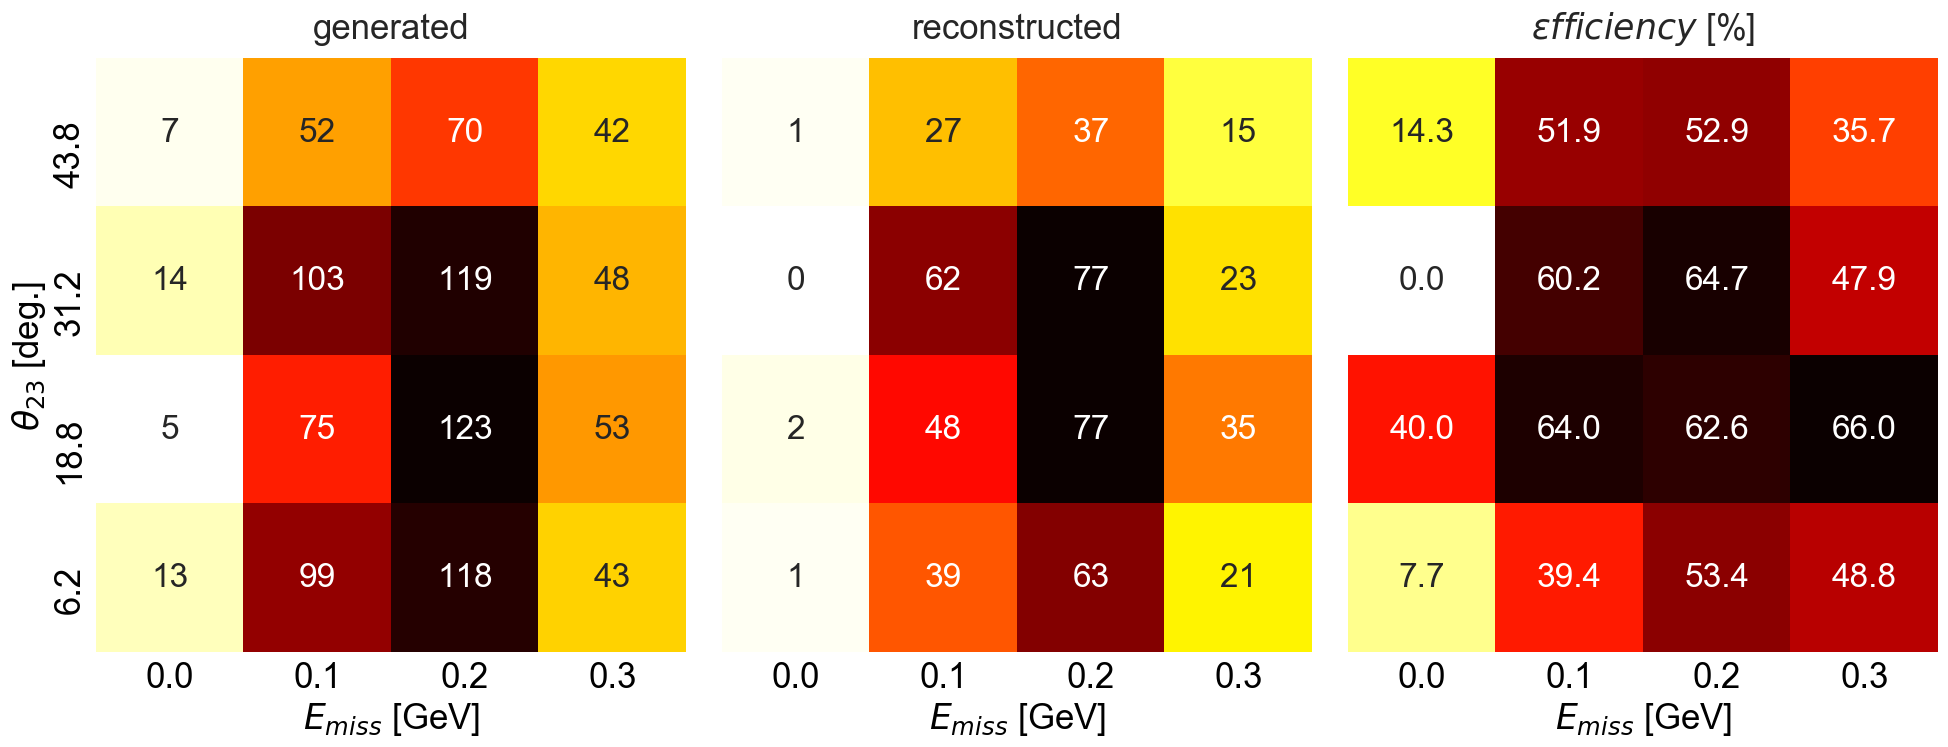

In [103]:
fig = plt.figure(figsize=(20,8))
sns.set(font_scale=2);
for i,(h,title) in enumerate(zip([hgen,hrec,hacc],['generated','reconstructed','$\epsilon fficiency$ [%]'])):
    ax = fig.add_subplot(1,3,i+1)
    sns.heatmap(h.astype(np.int) if i<2 else 100*h
                ,annot=True,fmt="d" if i<2 else ".1f"
                ,xticklabels=xticklabels
                ,yticklabels=yticklabels
                ,cbar=False,cmap='hot_r')
    set_axes(ax,x_label,y_label if i==0 else '',remove_ticks_y=True if i>0 else False,title=title)
    ax.invert_yaxis()
plt.tight_layout()
plt.savefig('/Users/erezcohen/Desktop/ppp_accetance_Emiss_theta23_GSIM.pdf')

# $x_B$ vs. $\alpha$ 

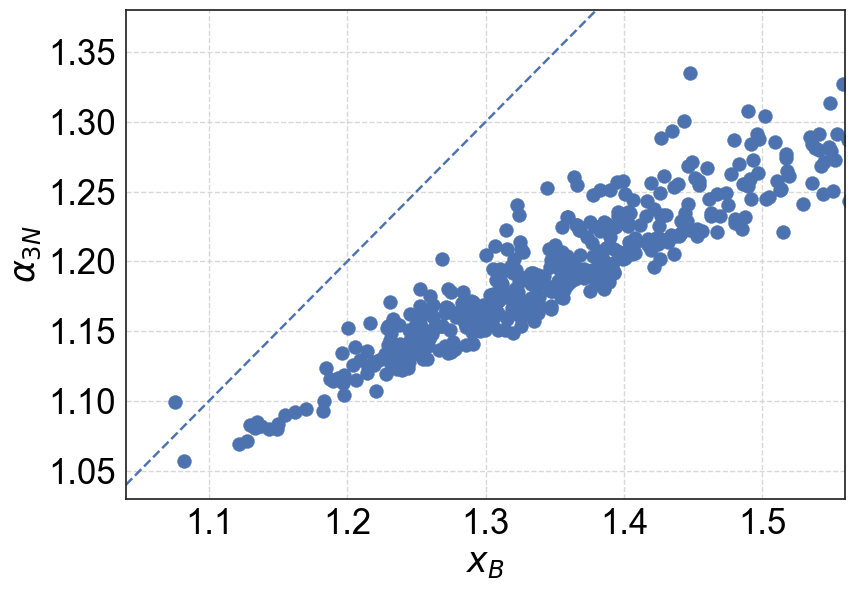

In [22]:
fig=plt.figure(figsize=(16,6))

ax = fig.add_subplot(1,2,1)
plt.scatter(selected['Xb'],selected['alpha_3N'],s=100);
set_axes(ax,r'$x_{B}$',r'$\alpha_{3N}$',do_add_grid=True
         ,xlim=(1.04,1.56),ylim=(1.03,1.38)
        )
plt.plot(ax.get_xlim(),ax.get_xlim(),'--',label='diagonal')
plt.tight_layout()

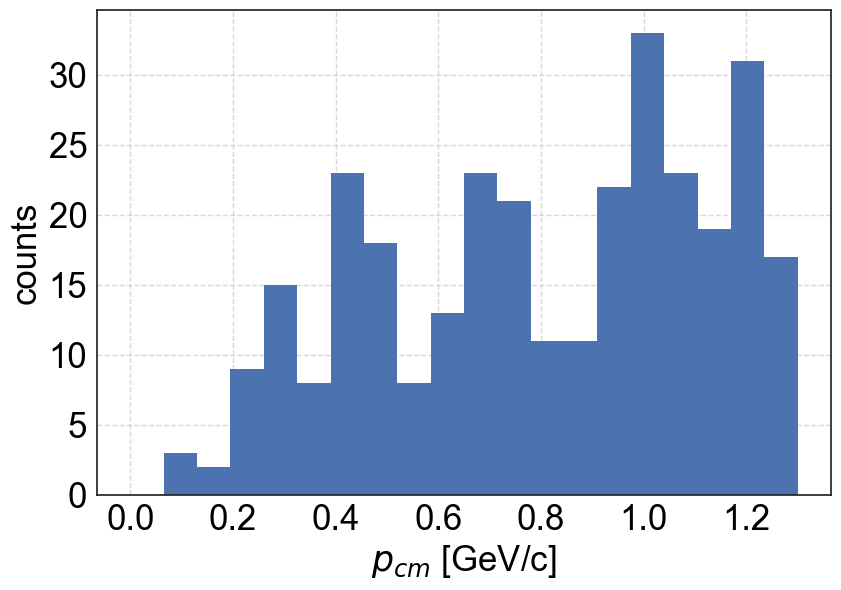

In [23]:
fig=plt.figure(figsize=(16,6))
ax = fig.add_subplot(1,2,1)
plt.hist(selected['Pcm.P()'],bins=linspace(0,1.3,21));
set_axes(ax,r'$p_{cm}$ [GeV/c]',r'counts',do_add_grid=True)
plt.tight_layout()

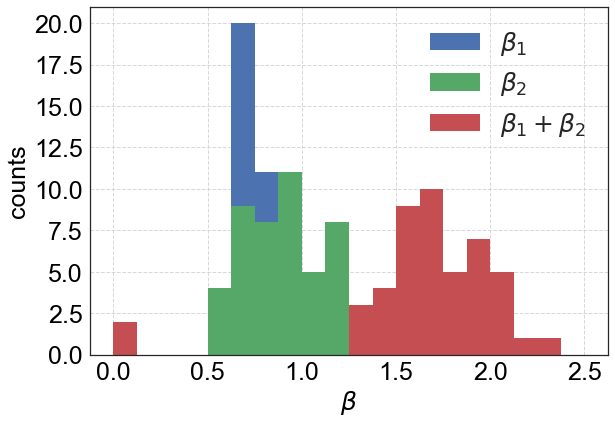

In [69]:
fig=plt.figure(figsize=(16,6))
ax = fig.add_subplot(1,2,1)
plt.hist(selected['beta_1'],label=r'$\beta_1$',bins=linspace(0,2.5,21));
plt.hist(selected['beta_2'],label=r'$\beta_2$',bins=linspace(0,2.5,21));
plt.hist(selected['beta_1']+selected['beta_2'],label=r'$\beta_1+\beta_2$',bins=linspace(0,2.5,21));
set_axes(ax,r'$\beta$',r'counts',do_add_grid=True,do_add_legend=True)
plt.tight_layout()

## Bjorken x

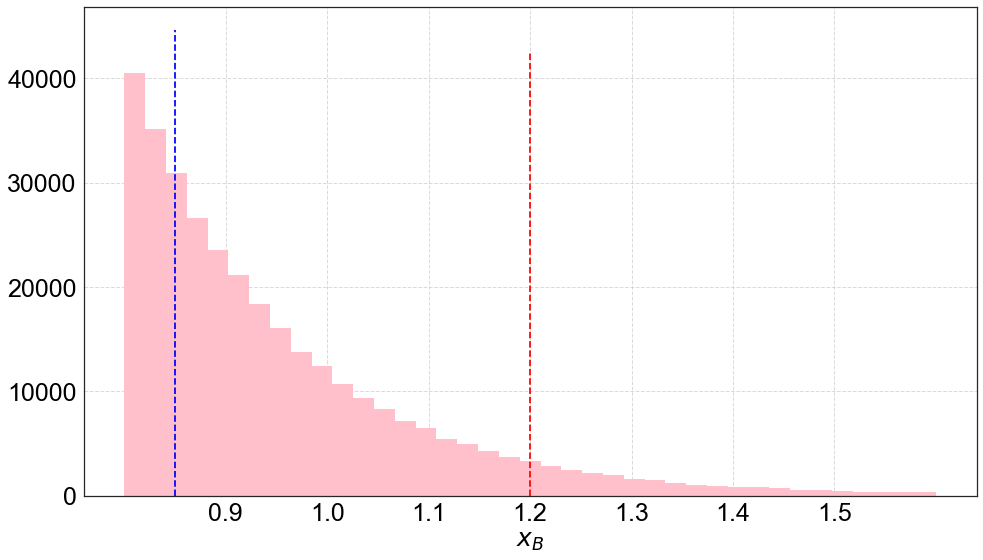

In [8]:
fix,ax=plt.subplots(figsize=(16,9))
sample = allana
# sample = selected
ax.hist(sample['Xb'],bins=np.linspace(0.8,1.6,40),color='pink');
set_axes(ax,'$x_B$')
ax.xaxis.set_ticks([0.9,1,1.1,1.2,1.3,1.4,1.5]);
plt.plot([1.2,1.2],ax.get_ylim(),'--',color='red')
plt.plot([0.85,0.85],ax.get_ylim(),'--',color='blue')

ax.grid(linestyle='--',alpha=0.7)

## leading proton ID

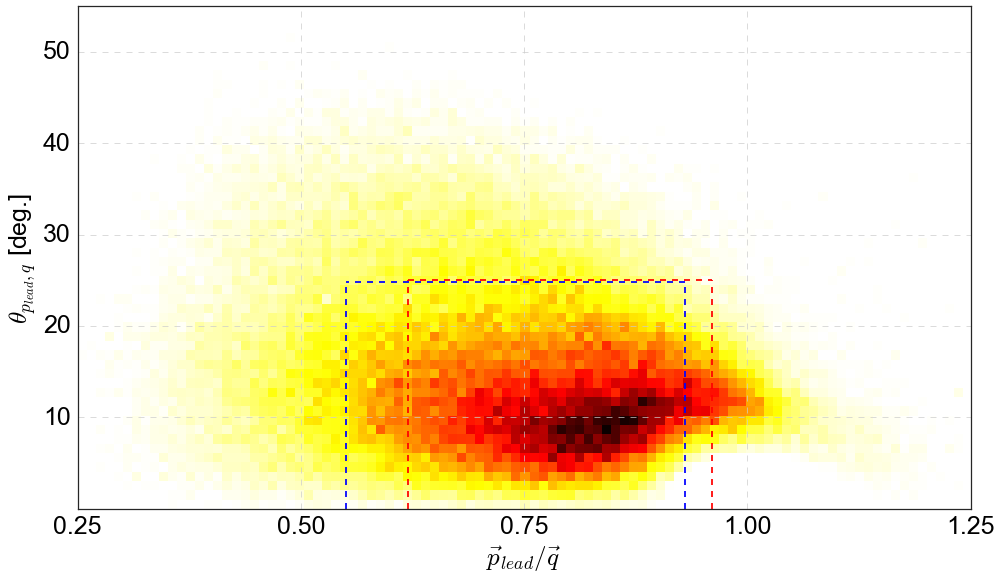

In [12]:
fix,ax=plt.subplots(figsize=(16,9))
sample = allana[(allana['Pmiss.P()']>0.3)&(allana['Pmiss.P()']<1.0)
               &(allana['pCTOFCut[0]']==1)
               &(allana['pVertex[0].Z()']>-27)&(allana['pVertex[0].Z()']<-20)]
plot_2d_hist(sample['p_over_q'],sample['theta_pq'],ax=ax,xlabel='$\\vec{p}_{lead}/\\vec{q}$',ylabel='$\\theta_{p_{lead},q}$ [deg.]'
             ,bins=(np.linspace(0.25,1.25,100),np.linspace(0,55,55)));
ax.xaxis.set_ticks([0.25,0.5,0.75,1,1.25]);ax.yaxis.set_ticks([10,20,30,40,50]);
plt.plot([0.62,0.62],[0,25],'--',color='red')
plt.plot([0.62,0.96],[25,25],'--',color='red')
plt.plot([0.96,0.96],[0,25],'--',color='red')
plt.plot([0.93,0.93],[0,24.8],'--',color='blue')
plt.plot([0.93,0.55],[24.8,24.8],'--',color='blue')
plt.plot([0.55,0.55],[0,24.8],'--',color='blue')
ax.grid(linestyle='--',alpha=0.7)

## Pmiss

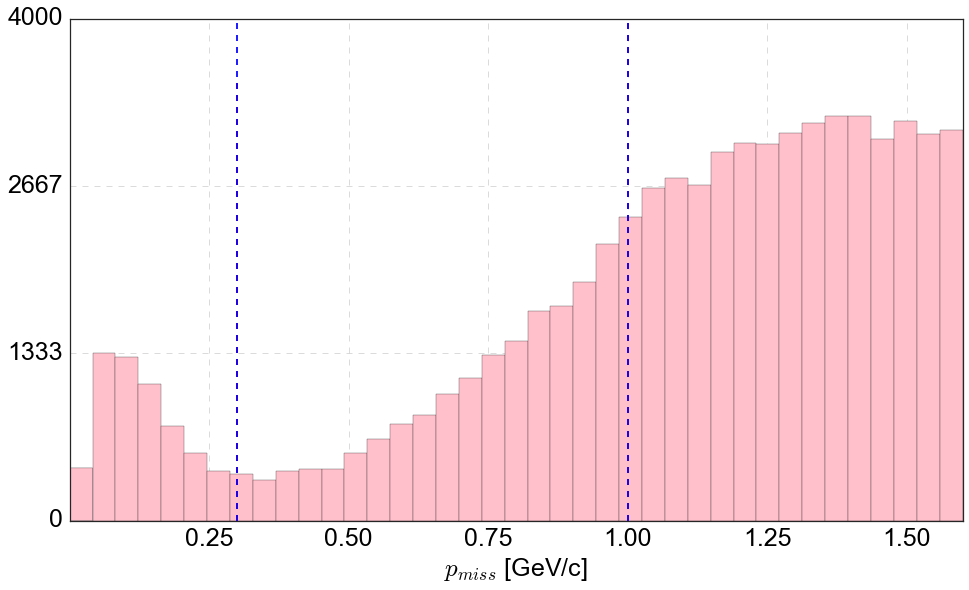

In [45]:
fix,ax=plt.subplots(figsize=(16,9))
sample = allana
ax.hist(sample['Pmiss.P()'],bins=np.linspace(0.,1.6,40),color='pink');
set_axes(ax,'$p_{miss}$ [GeV/c]')
ax.xaxis.set_ticks([0.25,0.5,0.75,1,1.25,1.5]);
plt.plot([.3,.3],ax.get_ylim(),'--',color='red')
plt.plot([1.,1.],ax.get_ylim(),'--',color='red')
plt.plot([.3,.3],ax.get_ylim(),'--',color='blue')
plt.plot([1.,1.],ax.get_ylim(),'--',color='blue')

ax.grid(linestyle='--',alpha=0.7)

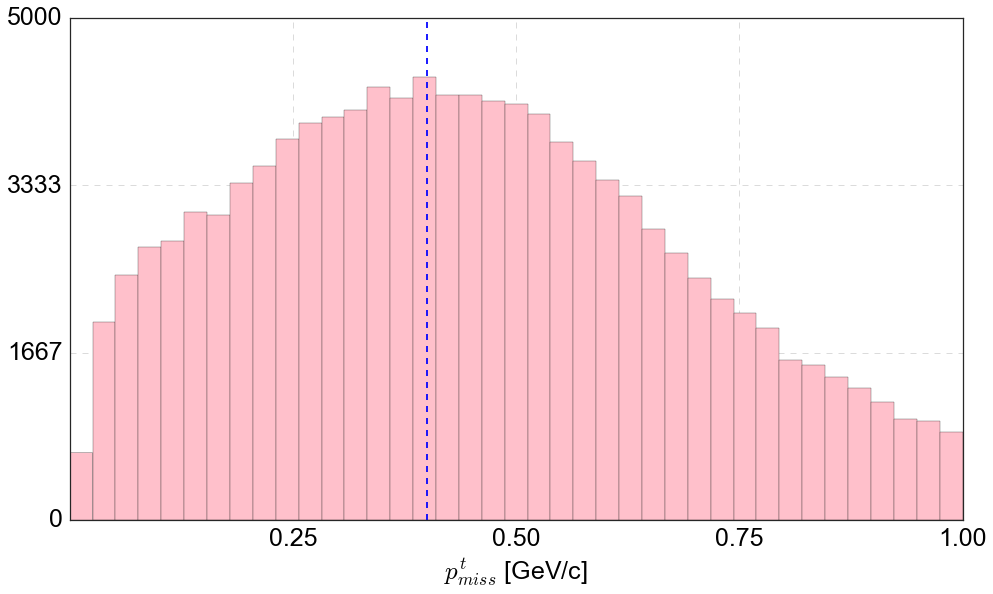

In [52]:
fix,ax=plt.subplots(figsize=(16,9))
sample = allana
ax.hist(sample['Pmiss.Pt()'],bins=np.linspace(0.,1.,40),color='pink');
set_axes(ax,'$p_{miss}^{t}$ [GeV/c]')
ax.xaxis.set_ticks([0.25,0.5,0.75,1,1.25,1.5]);
plt.plot([.0,.0],ax.get_ylim(),'--',color='red')
plt.plot([.4,.4],ax.get_ylim(),'--',color='blue')

ax.grid(linestyle='--',alpha=0.7)

## vertex

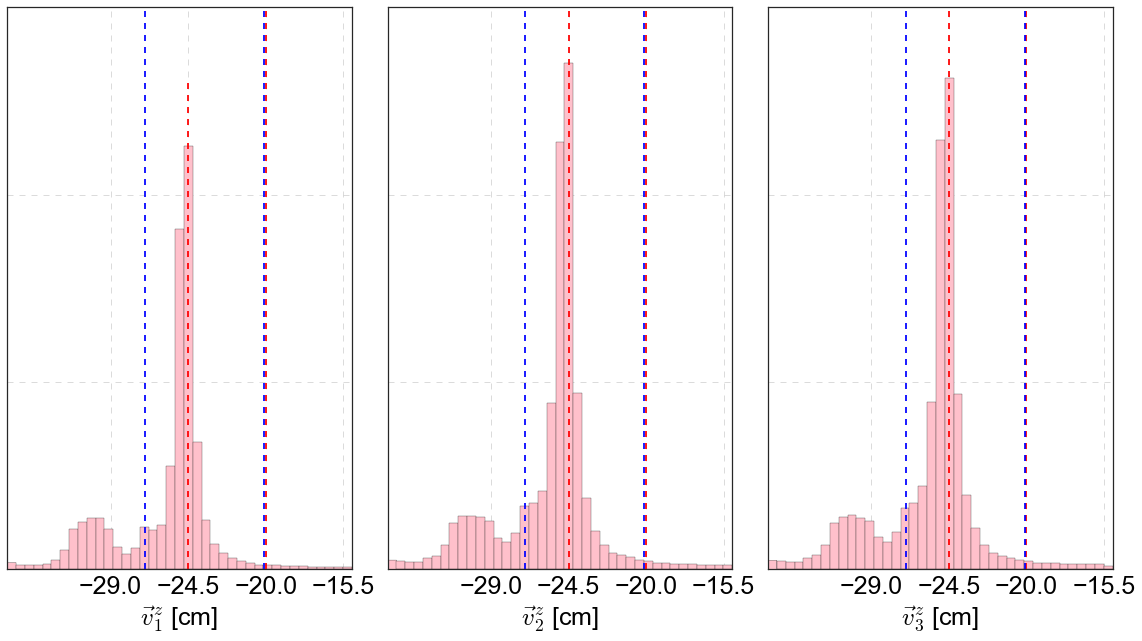

In [65]:
fig=plt.figure(figsize=(16,9))
sample = allana
for i in range(3):
    ax=fig.add_subplot(1,3,i+1)
    ax.hist(sample['pVertex[%d].Z()'%i],bins=np.linspace(-35,-15,40),color='pink');
    set_axes(ax,'$\\vec{v}_{%d}^{z}$ [cm]'%(i+1),y_label='')
    ax.grid(linestyle='--',alpha=0.7)
    ax.yaxis.set_major_formatter(ticker.NullFormatter())
    ax.xaxis.set_ticks([-29,-24.5,-20,-15.5]);
    plt.plot([-24.5,-24.5],ax.get_ylim(),'--',color='red')
    plt.plot([-20,-20],ax.get_ylim(),'--',color='red')
    plt.plot([-27,-27],ax.get_ylim(),'--',color='blue')
    plt.plot([-20.1,-20.1],ax.get_ylim(),'--',color='blue')
plt.tight_layout()

# selected ppp-candidates

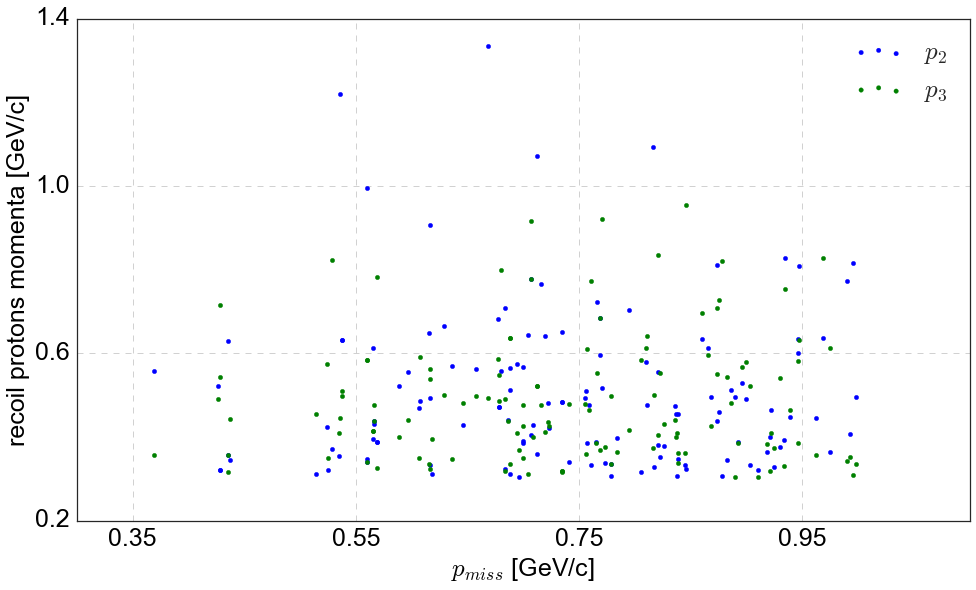

In [8]:
fig,ax=plt.subplots(figsize=(16,9))
plt.scatter(selected['Pmiss.P()'],selected['protons[1].P()'],color='blue',label='$p_2$')
plt.scatter(selected['Pmiss.P()'],selected['protons[2].P()'],color='green',label='$p_3$')
set_axes(ax,'$p_{miss}$ [GeV/c]','recoil protons momenta [GeV/c]')
ax.xaxis.set_ticks([0.35,0.55,0.75,0.95]);
ax.grid(linestyle='--',alpha=0.9)
ax.legend(fontsize=25,scatterpoints=3)

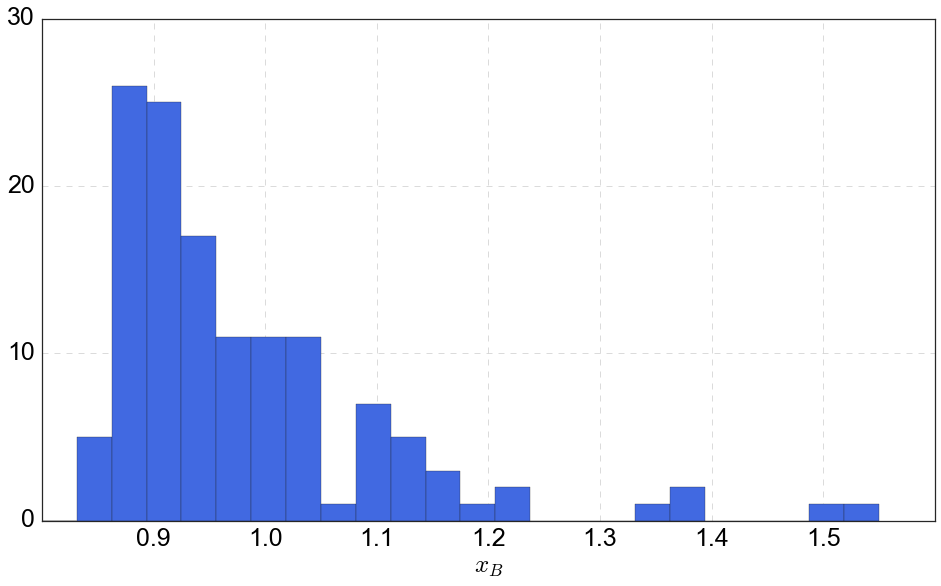

In [9]:
fix,ax=plt.subplots(figsize=(16,9))
ax.hist(selected['Xb'],bins=np.linspace(0.8,1.55,25),color='royalblue');
set_axes(ax,'$x_B$')
ax.xaxis.set_ticks([0.9,1,1.1,1.2,1.3,1.4,1.5]);
ax.grid(linestyle='--',alpha=0.7)

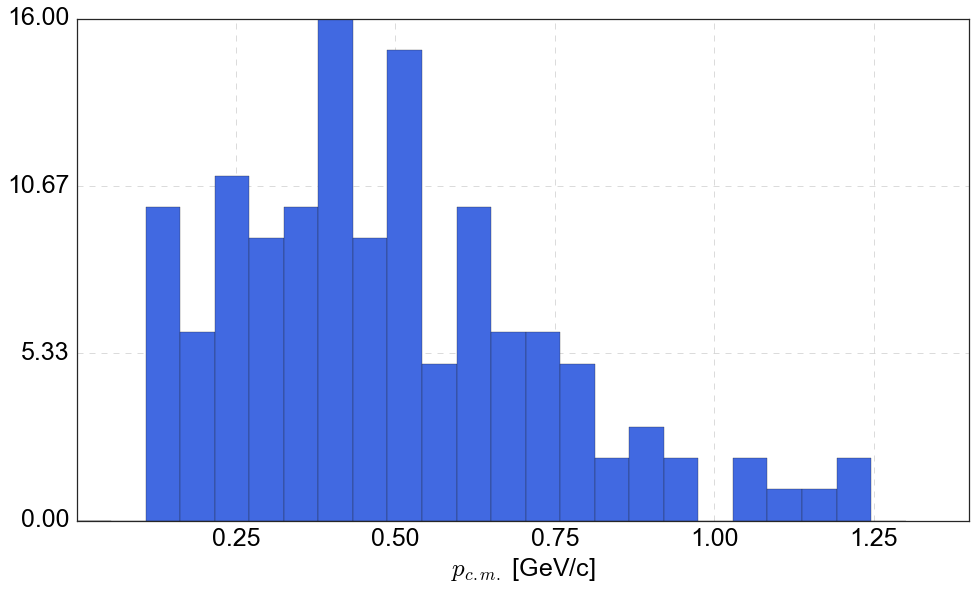

In [10]:
fix,ax=plt.subplots(figsize=(16,9))
ax.hist(selected['Pcm.P()'],bins=np.linspace(0.,1.3,25),color='royalblue');
set_axes(ax,'$p_{c.m.}$ [GeV/c]')
ax.xaxis.set_ticks([0.25,0.5,0.75,1,1.25]);
ax.grid(linestyle='--',alpha=0.7)

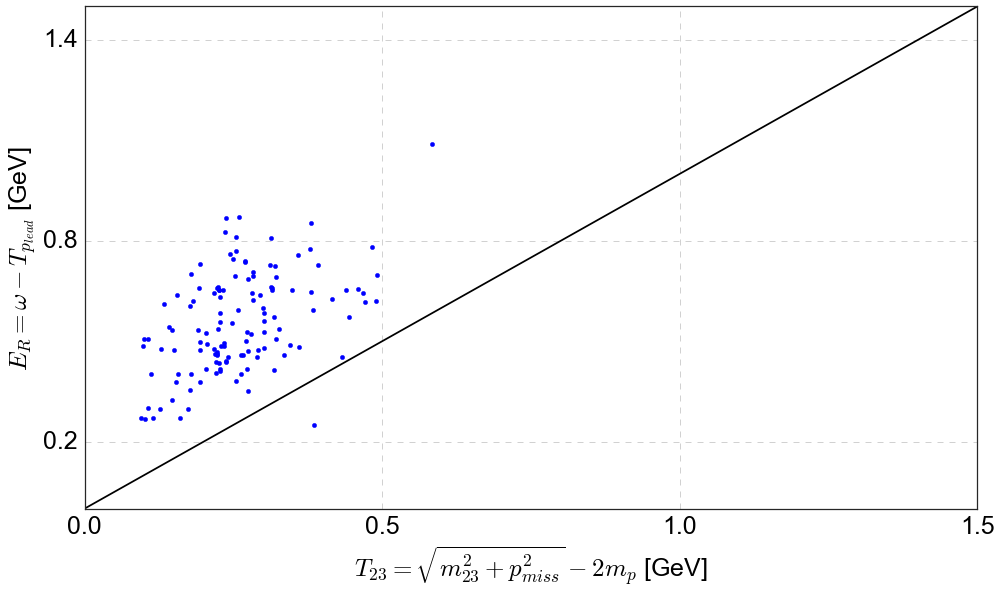

In [4]:
fig,ax=plt.subplots(figsize=(16,9))
plt.scatter(selected['T23'],selected['E_R'],color='blue')
set_axes(ax,'$T_{23} = \\sqrt{m_{23}^{2} + p_{miss}^{2}} - 2m_p $ [GeV]','$E_R = \\omega - T_{p_{lead}}$ [GeV]')
ax.yaxis.set_ticks([0.2,0.8,1.4,2]);
ax.set_xlim(0,1.5);ax.set_ylim(0,1.5)
plt.plot(ax.get_xlim(),ax.get_xlim(),color='black')
ax.grid(linestyle='--',alpha=0.9)

(1.9, 2.8)

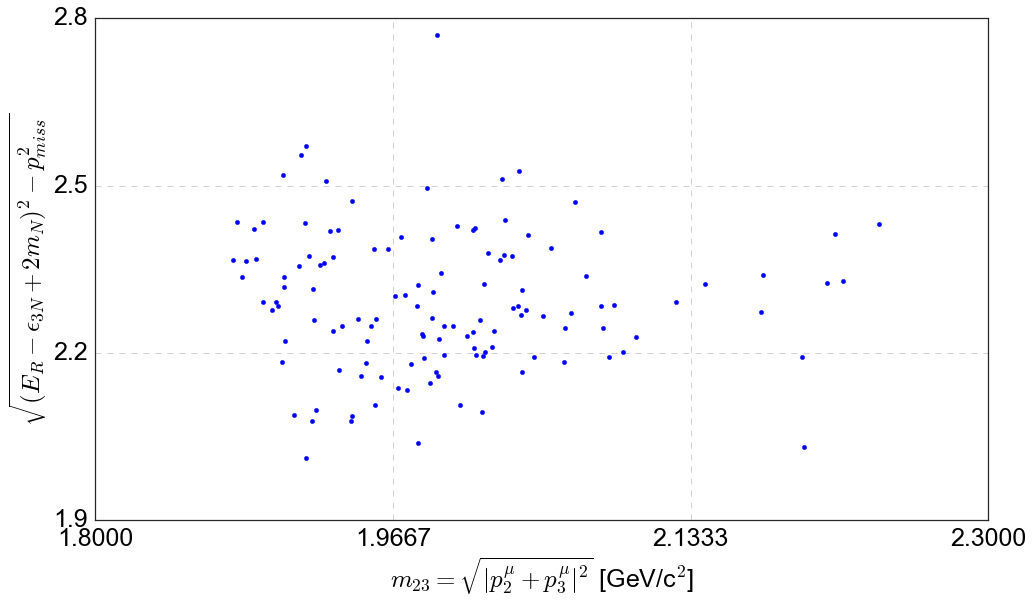

In [6]:
fig,ax=plt.subplots(figsize=(16,9))
eps_B = 0.0077 # 12C binding energy per nucleon
eps_3N = 3 * eps_B
plt.scatter(selected['m23'],np.sqrt( np.square(selected['E_R'] - eps_3N + 2*0.938) - np.square(selected['Pmiss.P()']) ),color='blue')
set_axes(ax,'$m_{23} = \\sqrt{|p_{2}^{\\mu}+p_{3}^{\\mu}|^{2}}$ [GeV/c$^{2}$]','$\\sqrt{ (E_R - \epsilon_{3N} + 2m_N)^{2} - p_{miss}^{2}}$')
ax.grid(linestyle='--',alpha=0.9)
ax.set_xlim(1.8,2.3);ax.set_ylim(1.9,2.8)

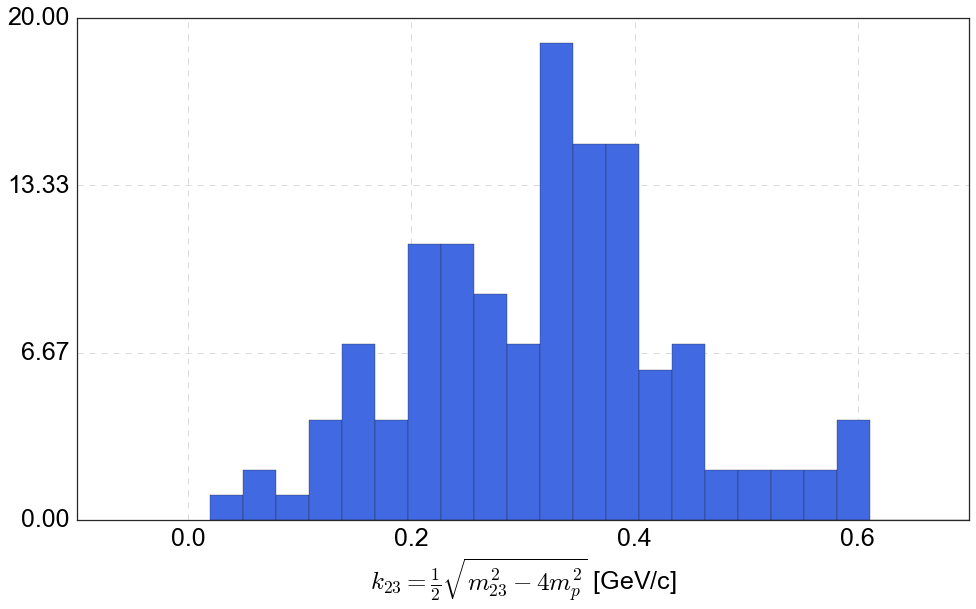

In [4]:
fig,ax=plt.subplots(figsize=(16,9))
ax.hist(selected['k23'],bins=np.linspace(-0.01,0.7,25),color='royalblue');
set_axes(ax,'$k_{23} = \\frac{1}{2}\\sqrt{m_{23}^2 - 4m_p^2}$ [GeV/c]')
ax.xaxis.set_ticks([0.,0.2,0.4,0.6]);
ax.grid(linestyle='--',alpha=0.7)

## W2

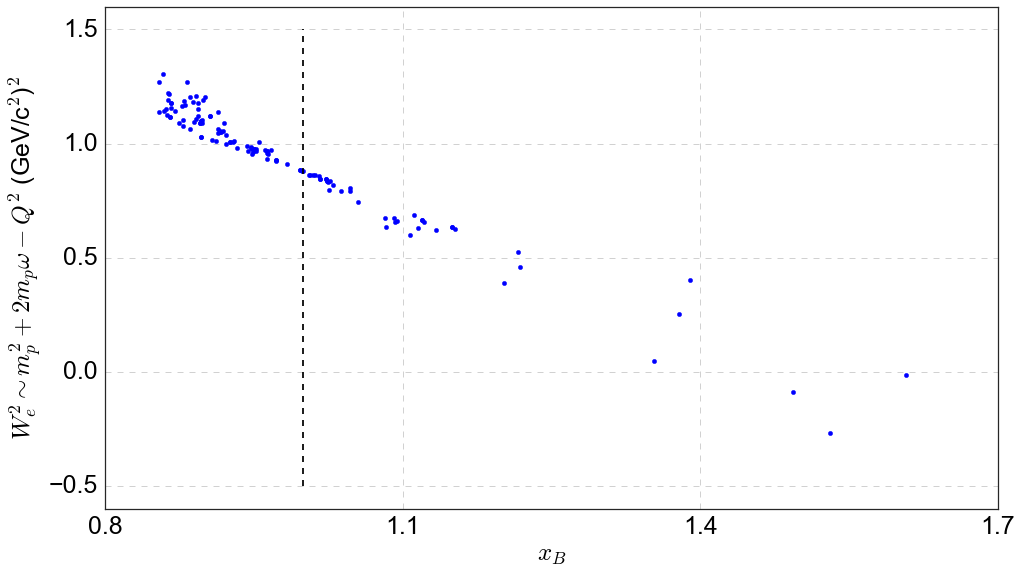

In [23]:
fig,ax=plt.subplots(figsize=(16,9))
plt.scatter(selected['Xb'],0.938*0.938 + 2.*0.938*selected['q.E()']-selected['Q2'],color='blue')
set_axes(ax,'$x_B$' ,'$W_e^2 \sim m_p^2 + 2m_p\\omega - Q^2$ (GeV/c$^2$)$^2$')
ax.yaxis.set_ticks([-0.5,0.,0.5,1.,1.5]);
plt.plot([1,1],ax.get_ylim(),color='black',linestyle='--')
ax.grid(linestyle='--',alpha=0.9)

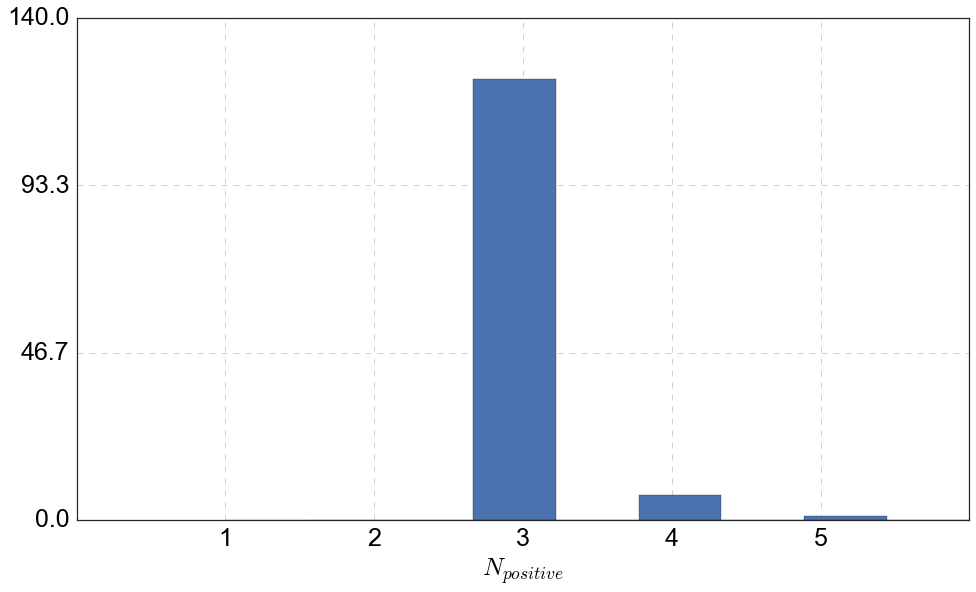

In [43]:
fig,ax=plt.subplots(figsize=(16,9))
plt.hist(selected['Np'],bins=np.linspace(1,6,10))
set_axes(ax,'$N_{positive}$')
ax.xaxis.set_ticks([1,2,3,4,5]);
ax.grid(linestyle='--',alpha=0.9)

In [3]:
selected_file = ROOT.TFile('/Users/erezcohen/Desktop/DataMining/AnaFiles/Ana_pppSRCCut_NoCTofDATA_C12.root')
selected_tree = selected_file.Get('anaTree') 
selected = tree2array( selected_tree, branches=variables )

ValueError: the branch or expression 'beta' is not present or valid

## Mmiss

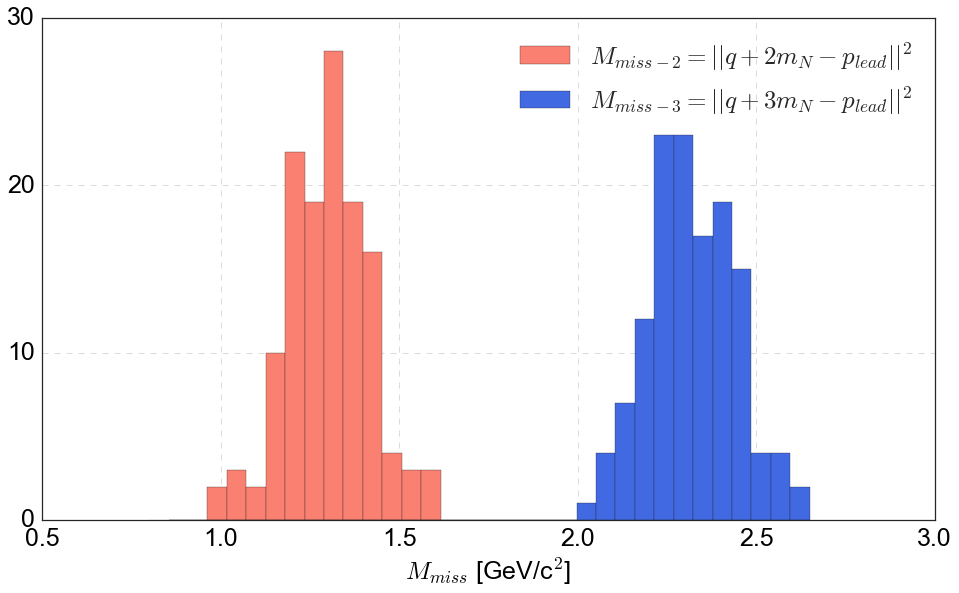

In [66]:
fig,ax=plt.subplots(figsize=(16,9))
bins=np.linspace(.8,2.65,35)
ax.hist(selected['Mmiss2'],bins=bins,color='salmon',label='$M_{miss-2} = ||q + 2m_{N} - p_{lead}|| ^{2} $');
ax.hist(selected['Mmiss3'],bins=bins,color='royalblue',label='$M_{miss-3} = ||q + 3m_{N} - p_{lead}|| ^{2} $'); #,histtype='step',linewidth=3
set_axes(ax,'$M_{miss} $ [GeV/c$^2$]')
ax.xaxis.set_ticks([0.5,1,1.5,2,2.5,3]);
ax.grid(linestyle='--',alpha=0.7)
ax.legend(fontsize=25,loc='upper right')